In [2]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)


## Lecture 17

### Simulating Jury Panels picked at random

In [3]:
sample_size = 100

#26% are black, 74% are not
eligible = [0.26, 0.74]

In [4]:
sample_proportions(sample_size, eligible)#.item(0)

array([0.28, 0.72])

In [5]:
def simulate_one_count():
    return sample_size * sample_proportions(sample_size, eligible).item(0)

In [6]:
counts = make_array()
for i in np.arange(10000):
    counts = np.append(counts, simulate_one_count())

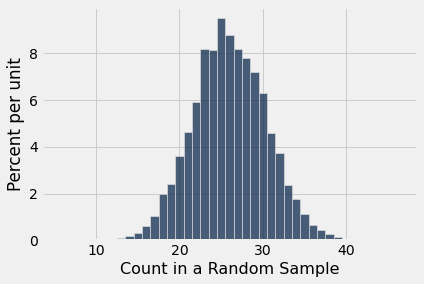

In [7]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins=np.arange(5.5, 46.6, 1))

#Plotting details; ignore details
# plots.ylim(-0.002, 0.09)
# plots.scatter(8, 0, color-'red', n=30)

## Multiple Categories

In [8]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.54, 0.12, 0.01),
    'Panels', make_array(0.26, 0.08, 0.54, 0.08, 0.04)
)
jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


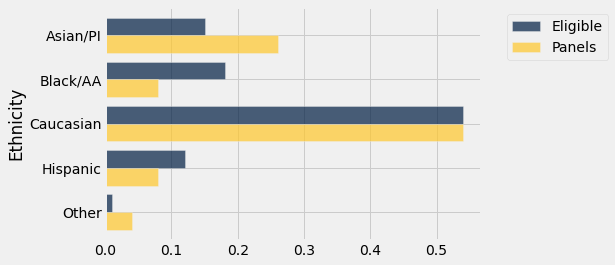

In [9]:
jury.barh('Ethnicity')
#Underrepresentation chart


In [10]:
#Now, is this random?
eligible_population = jury.column('Eligible')

In [11]:
sample_proportions(1453, eligible_population)
#1453 is the sample size to be drawn from the population

array([0.13902271, 0.18031659, 0.54094976, 0.12594632, 0.01376462])

In [12]:
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian/PI,0.15,0.26,0.165175
Black/AA,0.18,0.08,0.192017
Caucasian,0.54,0.54,0.523744
Hispanic,0.12,0.08,0.110805
Other,0.01,0.04,0.00825877


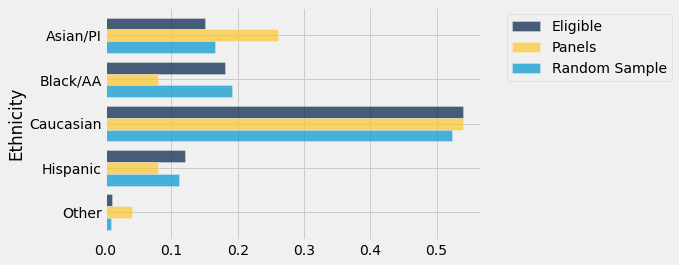

In [13]:
panels_and_sample.barh('Ethnicity')

## Distance Between Two Distributions

In [14]:
#Quantify the distance between two distributions

In [15]:
#The above was done only for one random sample.
#To do it a thousand times, seeing a thousand bar charts is not convenient

In [16]:
#Therefore, we need a new statistic

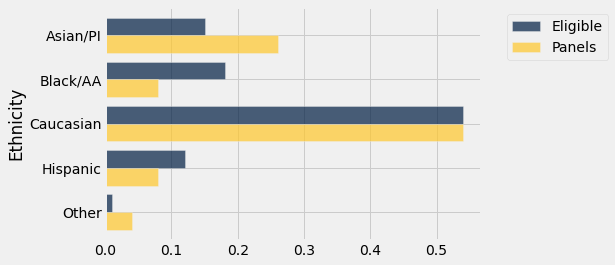

In [17]:
jury.barh('Ethnicity')

In [18]:
#Easy. Just (gold-blue)

In [19]:
jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian/PI,0.15,0.26,0.11
Black/AA,0.18,0.08,-0.1
Caucasian,0.54,0.54,0
Hispanic,0.12,0.08,-0.04
Other,0.01,0.04,0.03


In [20]:
jury_with_diffs = jury_with_diffs.with_column(
    'Absolute Difference', np.abs(jury_with_diffs.column('Difference'))
)

jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian/PI,0.15,0.26,0.11,0.11
Black/AA,0.18,0.08,-0.1,0.1
Caucasian,0.54,0.54,0,0
Hispanic,0.12,0.08,-0.04,0.04
Other,0.01,0.04,0.03,0.03


In [21]:
jury_with_diffs.column('Absolute Difference').sum() / 2

0.14

In [22]:
#You could have divided the above by 18 or multiplied by 99.
#It is just a distance.
#Just like inches can be converted to cm by just mmultipliying a factor,
#any number can be the divisor or multiplier. 
#HOWEVER, the largest error obtained due to a certain distribution, (seen later)
#is why the formula with 2 as a divisor makes sense.

In [23]:
#Total Variation Distance

In [24]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2))/2

In [25]:
panels = jury.column('Panels')
total_variation_distance(panels, eligible_population)

0.14

In [26]:
sample_distribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_distribution, eligible_population)

0.014501032346868514

In [27]:
#Far from 0.14